In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os



In [9]:
from google.colab import files

uploaded = files.upload()  # Opens a file picker

Saving cybersecurity_intrusion_data.csv to cybersecurity_intrusion_data.csv


In [10]:
# Load the dataset
file_path = "cybersecurity_intrusion_data.csv"  # Update the path if needed
df = pd.read_csv("cybersecurity_intrusion_data.csv")

In [11]:
df.head(10)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
5,SID_00006,453,UDP,5,380.471550,AES,0.422486,2,Chrome,1,0
6,SID_00007,815,ICMP,4,728.107165,AES,0.413772,1,Chrome,0,1
7,SID_00008,653,TCP,3,12.599906,DES,0.097719,3,Chrome,1,1
8,SID_00009,406,TCP,2,542.558895,NaN,0.294580,0,Chrome,1,0
9,SID_00010,608,UDP,6,531.944107,NaN,0.424117,1,Chrome,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [13]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [14]:
df.isnull().sum()  # Check for missing values

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [19]:
# Encode categorical columns
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])
    print(f"Encoded values for {col}:")
    print(df[col].unique())  # Print unique encoded values


Encoded values for protocol_type:
[1 2 0]
Encoded values for encryption_used:
[1 0 2]
Encoded values for browser_type:
[1 2 0 4 3]


In [21]:
# Define features and target variable
X = df.drop(columns=['session_id', 'attack_detected'])  # Remove non-predictive ID
y = df['attack_detected']

In [20]:
print("Features (X) Sample:")
print(X.head())  # Display first few rows of features

print("\nTarget (y) Sample:")
print(y.value_counts())  # Show distribution of attack_detected


Features (X) Sample:
   network_packet_size  protocol_type  login_attempts  session_duration  \
0                  599              1               4        492.983263   
1                  472              1               3       1557.996461   
2                  629              1               3         75.044262   
3                  804              2               4        601.248835   
4                  453              1               5        532.540888   

   encryption_used  ip_reputation_score  failed_logins  browser_type  \
0                1             0.606818              1             1   
1                1             0.301569              0             2   
2                1             0.739164              2             0   
3                1             0.123267              0             4   
4                0             0.054874              1             2   

   unusual_time_access  
0                    0  
1                    0  
2                   

In [26]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled Features (X_scaled) Sample:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())  # Convert to DataFrame for readability


Scaled Features (X_scaled) Sample:
   network_packet_size  protocol_type  login_attempts  session_duration  \
0             0.496899      -0.386226       -0.016346         -0.381125   
1            -0.143322      -0.386226       -0.525794          0.972960   
2             0.648132      -0.386226       -0.525794         -0.912503   
3             1.530327       1.553444       -0.016346         -0.243473   
4            -0.239103      -0.386226        0.493102         -0.330830   

   encryption_used  ip_reputation_score  failed_logins  browser_type  \
0         0.365746             1.554930      -0.500779      0.063225   
1         0.365746            -0.168029      -1.467959      0.904191   
2         0.365746             2.301950       0.466400     -0.777742   
3         0.365746            -1.174443      -1.467959      2.586125   
4        -0.907289            -1.560484      -0.500779      0.904191   

   unusual_time_access  
0            -0.419989  
1            -0.419989  
2     

In [18]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Predictions
y_pred = rf_model.predict(X_test)
print("Sample Predictions:")
print(y_pred[:10])  # Display first 10 predictions



Sample Predictions:
[1 1 1 0 0 0 1 0 0 0]


In [27]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8836
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90      1055
           1       0.99      0.75      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908



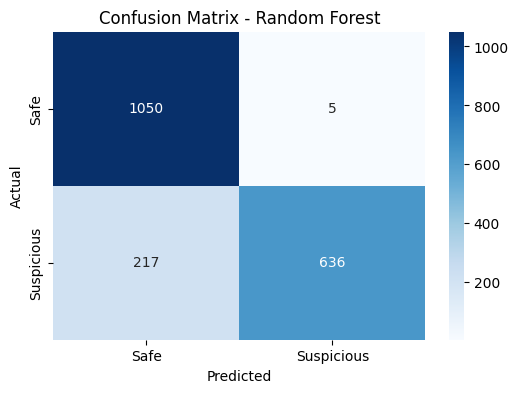

In [28]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Suspicious'], yticklabels=['Safe', 'Suspicious'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

<ipython-input-29-db5a1c1d656b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


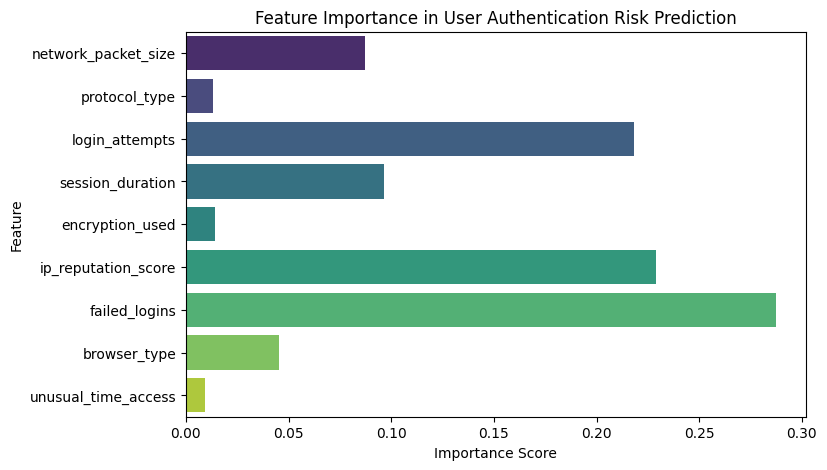

In [29]:
# Feature Importance Plot
feature_importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in User Authentication Risk Prediction")
plt.show()

<ipython-input-30-c9a0288d5e11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


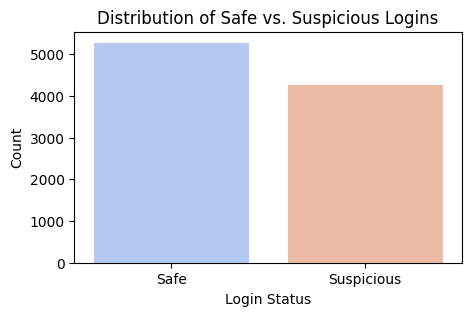

In [30]:
# Attack vs Safe Login Distribution
plt.figure(figsize=(5, 3))
sns.countplot(x=y, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Safe", "Suspicious"])
plt.xlabel("Login Status")
plt.ylabel("Count")
plt.title("Distribution of Safe vs. Suspicious Logins")
plt.show()

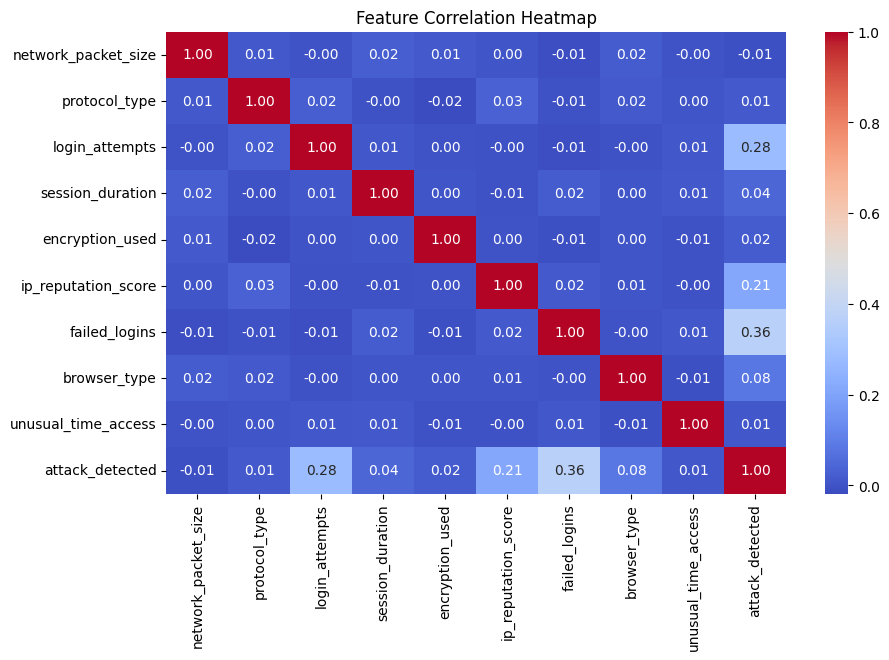

In [32]:

# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(columns=['session_id'])  # Exclude session_id since it's not numeric

# Heatmap of Feature Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()



In [34]:
# Example of predicting attack risk for a new login attempt
new_data = np.array([[500, 1, 3, 300.5, 1, 0.7, 2, 2, 1]])  # Example input
new_data_scaled = scaler.transform(new_data)

# Get prediction and probabilities
prediction = rf_model.predict(new_data_scaled)
prediction_proba = rf_model.predict_proba(new_data_scaled)

# Display prediction probabilities
print("Predicted probabilities:", prediction_proba)

# Print the final decision message
if prediction[0] == 1:
    print("The login attempt is SUSPICIOUS!")
else:
    print("The login attempt is SAFE!")

print("Thank you for using the User Authentication Risk Prediction System!")


Predicted probabilities: [[0.02 0.98]]
The login attempt is SUSPICIOUS!
Thank you for using the User Authentication Risk Prediction System!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
